In [1]:
from astroquery.heasarc import Heasarc
from astroquery.simbad import Simbad
from astropy.io import fits as FITS
from astropy.time import Time
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
%matplotlib inline

# Using Astroquery
This is a python package that can query many astronomical catalogs and databases. I queried the Swift master catalog a while ago by making a custom astropy table reader, however astroquery usage is straightforward and painless :) 

First I am going to look for the object I am studying (PG1553+113) on Simbad. Then I will query HEASARC Swift mission catalog. This object is thoroughly described here https://arxiv.org/pdf/1801.03335.pdf 



In [19]:
# Lets look at simbad catalog:
result_table = Simbad.query_object("PG 1553+113")

In [20]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
QSO B1553+113,15 55 43.0439,+11 11 24.365,14,14,0.019,0.019,90,A,O,2018yCat.1345....0G


In [21]:
# Astroquery can query all heasarc missions
missions = Heasarc.query_mission_list()

In [22]:
missions

Archive,name,Table_Description
str7,str27,str80
HEASARC,a1,HEAO 1 A1 X-Ray Source Catalog
HEASARC,a1point,HEAO 1 A1 Lightcurves
HEASARC,a2lcpoint,HEAO 1 A2 Pointed Lightcurves
HEASARC,a2lcscan,HEAO 1 A2 Scanned Lightcurves
HEASARC,a2led,HEAO 1 A2 LED Catalog
HEASARC,a2pic,HEAO 1 A2 Piccinotti Catalog
HEASARC,a2point,HEAO 1 A2 Pointing Catalog
HEASARC,a2rtraw,HEAO 1 A2 Raw Rates
HEASARC,a2specback,HEAO 1 A2 Spectra Background


In [23]:
# We are interested on swift data for the object PG 1553+113, an AGN.
result_table = Heasarc.query_object("PG 1553+113", "swiftmastr")

In [24]:
result_table = result_table.to_pandas()

In [25]:
result_table.sort_values("START_TIME")

,NAME,OBSID,RA,DEC,START_TIME,PROCESSING_DATE,XRT_EXPOSURE,UVOT_EXPOSURE,BAT_EXPOSURE,ARCHIVE_DATE,SEARCH_OFFSET_
2,b'1ES1553+113 ',b'00035021001',238.96771,11.18599,53480.150706,56948.0,5224.510,5065.049,5322.0,53491,b' 2.272 (PG 1553+113)\n'
0,b'1ES1553+113 ',b'00035021002',238.92167,11.20824,53649.061123,57043.0,10799.454,10479.905,10594.0,53660,b' 1.178 (PG 1553+113)\n'
1,b'1ES1553+113 ',b'00035021003',238.91203,11.21752,53651.004190,57043.0,10713.489,10446.983,10185.0,53662,b' 1.935 (PG 1553+113)\n'
6,b'PG1553+113 ',b'00031368001',238.93595,11.20419,54895.010405,57384.0,4072.899,3988.370,3342.0,54906,b' 0.930 (PG 1553+113)\n'
8,b'PG1553+113 ',b'00031368003',238.96329,11.16053,54933.026389,57435.0,3931.673,3787.347,4161.0,54944,b' 2.672 (PG 1553+113)\n'
7,b'PG1553+113 ',b'00031368004',238.93515,11.19327,54956.170139,57435.0,3952.395,3860.021,4026.0,54967,b' 0.391 (PG 1553+113)\n'
10,b'PG1553+113 ',b'00031368005',238.90654,11.16186,54987.452778,57436.0,3852.154,3655.317,3748.0,54998,b' 2.162 (PG 1553+113)\n'
12,b'PG1553+113 ',b'00031368006',238.91187,11.17779,55017.084722,57485.0,3206.642,3118.345,3125.0,55028,b' 1.267 (PG 1553+113)\n'
49,b'PG1553+113 ',b'00031368007',238.91854,11.16879,55019.626377,57485.0,1573.468,1527.175,1608.0,55030,b' 1.428 (PG 1553+113)\n'
5,b'PG1553+113 ',b'00031368008',238.88409,11.19239,55047.999306,57486.0,4127.999,4193.788,4357.0,55058,b' 2.667 (PG 1553+113)\n'


In [26]:
# Lets look at the times of each observation
times = Time(result_table.START_TIME, format="mjd", out_subfmt="date").iso
times.sort()
times

array(['2005-04-20', '2005-10-06', '2005-10-08', '2009-03-05',
       '2009-04-12', '2009-05-05', '2009-06-05', '2009-07-05',
       '2009-07-07', '2009-08-04', '2009-09-09', '2009-10-03',
       '2010-01-02', '2010-02-05', '2011-08-08', '2012-02-16',
       '2012-02-21', '2012-02-23', '2012-02-25', '2012-02-27',
       '2012-02-29', '2012-03-02', '2012-03-14', '2012-03-16',
       '2012-03-19', '2012-03-22', '2012-03-25', '2012-03-31',
       '2012-04-17', '2012-04-21', '2012-04-24', '2012-04-25',
       '2012-04-26', '2012-04-27', '2012-04-28', '2012-04-29',
       '2012-05-08', '2012-05-11', '2012-05-16', '2012-05-18',
       '2012-05-19', '2012-05-23', '2012-05-25', '2012-06-10',
       '2012-06-13', '2012-06-16', '2012-06-17', '2012-06-24',
       '2013-04-08', '2013-04-11', '2013-05-04', '2013-05-08',
       '2013-05-10', '2013-05-11', '2013-05-16', '2013-06-03',
       '2013-06-08', '2013-06-08', '2013-06-09', '2013-06-11',
       '2013-06-13', '2013-07-01', '2013-07-04', '2013-

# Observation data

The previous table is a list of observations recorded by Swift mission. Each one of these observations can be fetched from Swift archive ftp server (and other sources such as HEASARC). 

I am following this documentation, from Swift, to explore this data: https://swift.gsfc.nasa.gov/analysis/xrt_swguide_v1_2.pdf

I am focusing on the latest observation, seen on 2018-09-06, obsid = 00035021041. The data for this event can be found here: ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041. I am also focusing only on the x-ray instrument (xrt) for now.

In [14]:
! wget --recursive --no-parent "ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt" -P "~/DATOS/Swift/" 

--2018-09-27 23:04:18--  ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt
           => ‘/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/.listing’
Resolving legacy.gsfc.nasa.gov (legacy.gsfc.nasa.gov)... 129.164.179.23, 2001:4d0:2310:150::23
Connecting to legacy.gsfc.nasa.gov (legacy.gsfc.nasa.gov)|129.164.179.23|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /swift/data/obs/2018_09/00035021041 ... done.
==> PASV ... done.    ==> LIST ... done.

legacy.gsfc.nasa.go     [ <=>                ]     420  --.-KB/s    in 0.01s   

2018-09-27 23:04:19 (33.5 KB/s) - ‘/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/.listing’ saved [420]

Removed ‘/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/.listing’.
--2018-09-27 23:04:19--  ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041

==> PASV ... done.    ==> RETR sw00035021041xwtw2st_uf.evt.gz ... done.
Length: 8205 (8.0K)

legacy.gsfc.nasa.go 100%[===================>]   8.01K  --.-KB/s    in 0.03s   

2018-09-27 23:04:29 (284 KB/s) - ‘/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xwtw2st_uf.evt.gz’ saved [8205]

--2018-09-27 23:04:29--  ftp://legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xwtw2st_ufre.evt.gz
           => ‘/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xwtw2st_ufre.evt.gz’
==> CWD not required.
==> PASV ... done.    ==> RETR sw00035021041xwtw2st_ufre.evt.gz ... done.
Length: 8111 (7.9K)

legacy.gsfc.nasa.go 100%[===================>]   7.92K  --.-KB/s    in 0.03s   

2018-09-27 23:04:30 (316 KB/s) - ‘/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xwtw2st_ufre.evt.gz’ saved [8111]

--201

In [15]:
# Window timed
wtimg = FITS.open("~/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xwt_sk.img.gz")
# Photon count
pcimg = FITS.open("~/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xpc_sk.img.gz")

In [17]:
wtimg.info(), pcimg.info()

Filename: /home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xwt_sk.img.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     340   (1000, 1000)   int32   
  1  GTI           1 BinTableHDU     65   1R x 2C   [1D, 1D]   
Filename: /home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/products/sw00035021041xpc_sk.img.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     445   (1000, 1000)   int32   
  1  GTI           1 BinTableHDU     65   1R x 2C   [1D, 1D]   
  2  SRCLIST       1 BinTableHDU    107   1R x 11C   [1E, 1E, 1E, 1E, 1E, 1D, 1D, 1E, 1E, 1E, 1E]   


(None, None)

In [38]:
print("WT Image data GTI and cols")
print(wtimg[1].data)
print(wtimg[1].columns)
print("PC Image data GTI and cols")
print(pcimg[1].data)
print(pcimg[1].columns)
print("PC Source list info")
print(pcimg[2].data)
print(pcimg[2].columns)

WT Image data GTI and cols
[(5.57896071e+08, 5.57896085e+08)]
ColDefs(
    name = 'START'; format = '1D'; unit = 's'
    name = 'STOP'; format = '1D'; unit = 's'
)
PC Image data GTI and cols
[(5.57896087e+08, 5.57896413e+08)]
ColDefs(
    name = 'START'; format = '1D'; unit = 's'
    name = 'STOP'; format = '1D'; unit = 's'
)
PC Source list info
[(1.1051989, 0.06397975, 429.1128, 479.07895, 1.01664, 238.92975069, 11.18899953, nan, 29.4664, 0., 17.274197)]
ColDefs(
    name = 'SRCRATE'; format = '1E'; unit = 'count/s'
    name = 'SRCRATE_ERR'; format = '1E'; unit = 'count/s'
    name = 'X'; format = '1E'; unit = 'pixel'
    name = 'Y'; format = '1E'; unit = 'pixel'
    name = 'VIGNET'; format = '1E'
    name = 'RA'; format = '1D'; unit = 'deg'
    name = 'DEC'; format = '1D'; unit = 'deg'
    name = 'ERRRAD'; format = '1E'; unit = 'arcsec'
    name = 'HBOXSIZE'; format = '1E'; unit = 'arcsec'
    name = 'PROB'; format = '1E'
    name = 'SNR'; format = '1E'
)


In [42]:
# When plotting the image data it was too difficult to see the actual informative points. 
# Therefore here I am looking their location to plot a window surrounding them.
wtbbox = [(min(x),max(x)) for x in np.where(wtimg[0].data>0)]
print("Bounding box for wt image: ", wtbbox)
pcbbox = [(min(x),max(x)) for x in np.where(pcimg[0].data>0)]
print("Bounding box for pc image: ", pcbbox)

Bounding box for wt image:  [(490, 510), (414, 596)]
Bounding box for pc image:  [(210, 795), (229, 805)]


/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


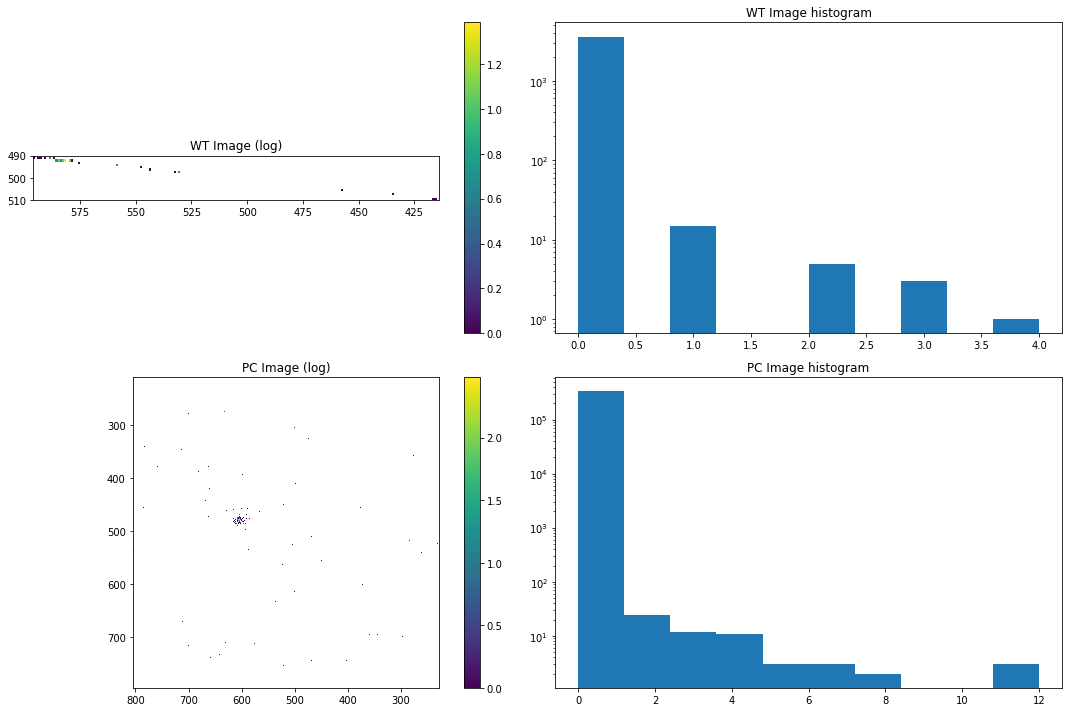

In [63]:
mlp.rcParams["figure.figsize"] = (15,10)
plt.subplot(2,2,1)
plt.title("WT Image (log)")
plt.imshow(np.log(wtimg[0].data[wtbbox[0][0]:wtbbox[0][1], wtbbox[1][0]:wtbbox[1][1]]), 
           extent =(wtbbox[1][1],wtbbox[1][0], wtbbox[0][1],wtbbox[0][0]) )
plt.colorbar()
plt.subplot(2,2,2)
plt.title("WT Image histogram")
plt.hist(np.ndarray.flatten(wtimg[0].data[wtbbox[0][0]:wtbbox[0][1], wtbbox[1][0]:wtbbox[1][1]]))
plt.yscale("log")
plt.subplot(2,2,3)
plt.title("PC Image (log)")
plt.imshow(np.log(pcimg[0].data[pcbbox[0][0]:pcbbox[0][1], pcbbox[1][0]:pcbbox[1][1]]),
          extent =(pcbbox[1][1],pcbbox[1][0], pcbbox[0][1],pcbbox[0][0]), )
plt.colorbar()
plt.subplot(2,2,4)
plt.title("PC Image histogram")
plt.hist(np.ndarray.flatten(pcimg[0].data[pcbbox[0][0]:pcbbox[0][1], pcbbox[1][0]:pcbbox[1][1]]))
plt.yscale("log")
plt.tight_layout()

## Event files

Lets read now the event file for this same observation.

In [64]:
event = FITS.open("/home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xpcw3po_cl.evt.gz")

In [65]:
event.info()

Filename: /home/guillermo/DATOS/Swift/legacy.gsfc.nasa.gov/swift/data/obs/2018_09/00035021041/xrt/event/sw00035021041xpcw3po_cl.evt.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  EVENTS        1 BinTableHDU    493   465R x 11C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1I, 16X]   
  2  GTI           1 BinTableHDU    106   1R x 2C   [1D, 1D]   
  3  BADPIX        1 BinTableHDU    126   220R x 6C   [1I, 1I, 1I, 1I, I, 16X]   
  4  BIASDIFF      1 BinTableHDU    153   14R x 13C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1J, 1J, 1J, 1J]   


In [66]:
event[1].columns

ColDefs(
    name = 'TIME'; format = '1D'; unit = 's'
    name = 'X'; format = '1I'; unit = 'pixel'; null = -1; coord_type = 'RA---TAN'; coord_unit = 'deg'; coord_ref_point = 500.5; coord_ref_value = 238.8821; coord_inc = -0.0006548089
    name = 'Y'; format = '1I'; unit = 'pixel'; null = -1; coord_type = 'DEC--TAN'; coord_unit = 'deg'; coord_ref_point = 500.5; coord_ref_value = 11.20303; coord_inc = 0.0006548089
    name = 'RAWX'; format = '1I'; unit = 'pixel'; coord_type = 'RAWX'; coord_ref_point = 300.5; coord_ref_value = 299.5; coord_inc = 1
    name = 'RAWY'; format = '1I'; unit = 'pixel'; coord_type = 'RAWY'; coord_ref_point = 300.5; coord_ref_value = 299.5; coord_inc = 1
    name = 'DETX'; format = '1I'; unit = 'pixel'; coord_type = 'DETX'; coord_unit = 'mm'; coord_ref_point = 300.5; coord_ref_value = 0.0; coord_inc = 0.04
    name = 'DETY'; format = '1I'; unit = 'pixel'; coord_type = 'DETY'; coord_unit = 'mm'; coord_ref_point = 300.5; coord_ref_value = 0.0; coord_inc = 0.04
   

In [67]:
event[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                  465 / Number of events                               
PCOUNT  =                    0 / size of special data area:                     
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   11 / number of fields in each row                   
TTYPE1  = 'TIME    '           / Time of events                                 
TFORM1  = '1D      '           / data format of field                           
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'X       '           / Event X position Sky coordinates               
TFORM2  = '1I      '        

In [68]:
# Are there pixels outside the GTI window?
# Nope. Perhaps they are in bad pixels array.
gti = event[2].data[0]
event[1].data[(event[1].data.TIME < gti[0]) & (event[1].data.TIME > gti[1])]

FITS_rec([],
         dtype=(numpy.record, [('TIME', '>f8'), ('X', '>i2'), ('Y', '>i2'), ('RAWX', '>i2'), ('RAWY', '>i2'), ('DETX', '>i2'), ('DETY', '>i2'), ('PHA', '>i4'), ('PI', '>i4'), ('GRADE', '>i2'), ('STATUS', 'u1', (2,))]))

(array([52., 48., 47., 46., 54., 38., 40., 51., 43., 46.]),
 array([5.57896087e+08, 5.57896119e+08, 5.57896151e+08, 5.57896184e+08,
        5.57896216e+08, 5.57896248e+08, 5.57896281e+08, 5.57896313e+08,
        5.57896345e+08, 5.57896378e+08, 5.57896410e+08]),
 <a list of 10 Patch objects>)

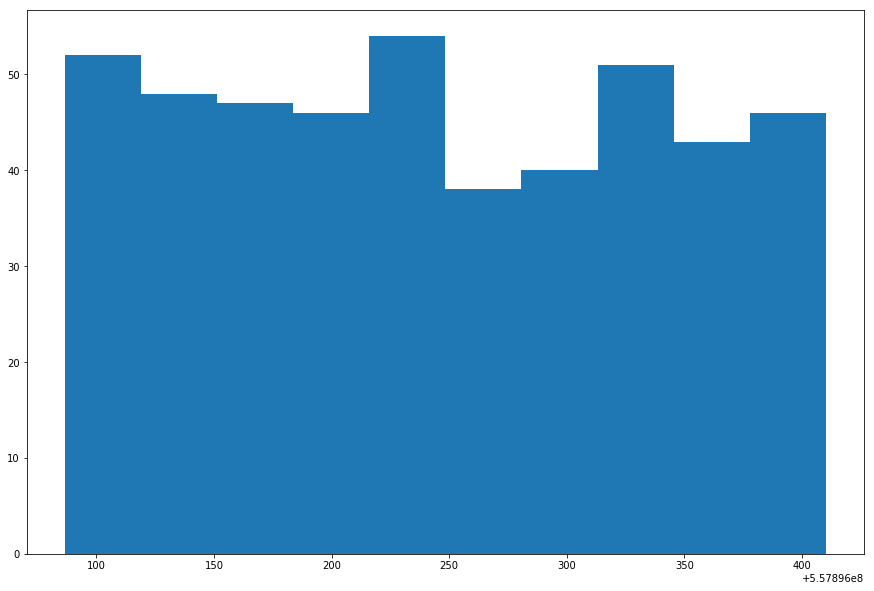

In [69]:
# Let's see the distr of the time. This time is given in seconds. 
# Note the window timed event lasts ~400s =  6.7 minutes, and the pixels are detected
# kind of uniformly during the event.
plt.hist([datum[0] for datum in event[1].data])

In [70]:
# Columns in the bad pixel table. This is described in the docs.
event[3].columns

ColDefs(
    name = 'RAWX'; format = '1I'; unit = 'pixel'
    name = 'RAWY'; format = '1I'; unit = 'pixel'
    name = 'Amp'; format = '1I'
    name = 'TYPE'; format = '1I'
    name = 'YEXTENT'; format = 'I'
    name = 'BADFLAG'; format = '16X'
)

In [71]:
eventData = event[1].data

In [72]:
eventData = pd.DataFrame(data = eventData.tolist(), columns = eventData.names)

Text(0.5,1,'Photon counter event plot of Pulse Invariant values')

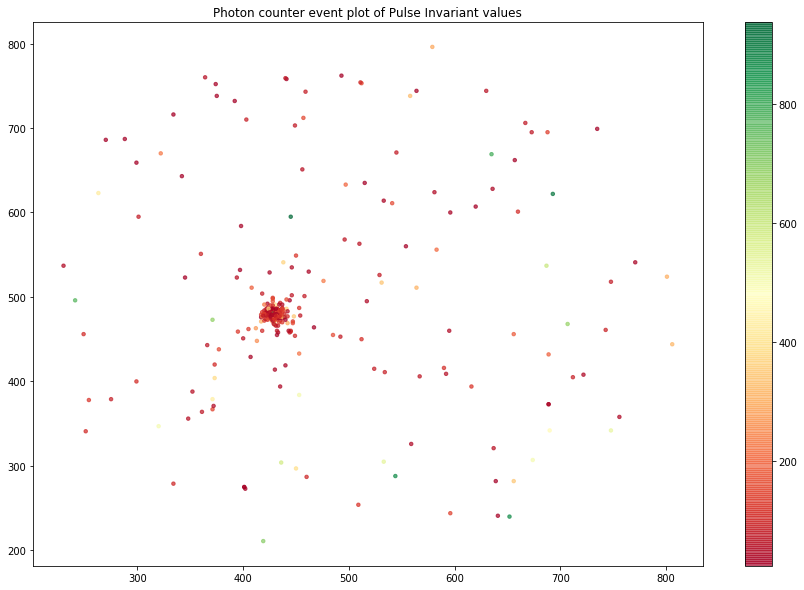

In [82]:
mlp.rcParams["figure.figsize"] = (15,10)
eventData = eventData[eventData.PI < 999]
plt.scatter(eventData.X, eventData.Y, 12, 
            c = eventData.PI, cmap="RdYlGn", alpha = 0.7 )
plt.colorbar()
plt.title("Photon counter event plot of Pulse Invariant values")

In [174]:
eventData.PI.describe()

count    464.000000
mean     146.155172
std      152.098786
min       24.000000
25%       54.000000
50%       97.000000
75%      161.250000
max      938.000000
Name: PI, dtype: float64